In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
conda install -c conda-forge matplotlib

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [11]:
from pandas.io.parsers import read_csv

In [637]:
data = read_csv("D:\hihi.csv", sep=",")

In [638]:
xy = np.array(data, dtype=np.float32)

In [639]:
data.head(3)

,year,avgTemp,minTemp,maxTemp,corona,result
0,20180101,-1,-5,4,0,381
1,20180102,-2,-4,2,0,181
2,20180103,-5,-7,0,0,271


In [640]:
from sklearn.model_selection import train_test_split

In [641]:
x = xy[:,1:-1]

In [642]:
y = xy[:, -1]

In [643]:
data.head(5)

,year,avgTemp,minTemp,maxTemp,corona,result
0,20180101,-1,-5,4,0,381
1,20180102,-2,-4,2,0,181
2,20180103,-5,-7,0,0,271
3,20180104,-5,-9,-1,0,138
4,20180105,-3,-6,2,0,160


In [644]:
df_cor = data.corr()

In [645]:
df_cor.style.background_gradient(cmap="coolwarm").set_precision(3)

D:\tensorflow\envs\tens_2\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
D:\tensorflow\envs\tens_2\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,year,avgTemp,minTemp,maxTemp,corona,result
year,1.000,-0.115,-0.121,-0.110,nan,0.236
avgTemp,-0.115,1.000,0.988,0.990,nan,0.049
minTemp,-0.121,0.988,1.000,0.962,nan,0.001
maxTemp,-0.110,0.990,0.962,1.000,nan,0.095
corona,nan,nan,nan,nan,nan,nan
result,0.236,0.049,0.001,0.095,nan,1.000


In [646]:
xy.shape

(760, 6)

In [647]:
cor_target=abs(df_cor['result'])

In [648]:
relevant_features = cor_target[cor_target>0.04].index.values.tolist()

In [649]:
df_fin=data[relevant_features]

In [650]:
df_fin.head(3)

,year,avgTemp,maxTemp,result
0,20180101,-1,4,381
1,20180102,-2,2,181
2,20180103,-5,0,271


In [651]:
xy[0:3, :]

array([[ 2.0180100e+07, -1.0000000e+00, -5.0000000e+00,  4.0000000e+00,
         0.0000000e+00,  3.8100000e+02],
       [ 2.0180102e+07, -2.0000000e+00, -4.0000000e+00,  2.0000000e+00,
         0.0000000e+00,  1.8100000e+02],
       [ 2.0180104e+07, -5.0000000e+00, -7.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.7100000e+02]], dtype=float32)

In [652]:
from sklearn.model_selection import train_test_split

In [653]:
x = xy[:,1:-1]

In [654]:
y = xy[:,-1]

In [655]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [656]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all, test_size=0.2, random_state=42)

In [657]:
y

array([ 381.,  181.,  271.,  138.,  160.,  222.,  221.,  127.,   86.,
         76.,   77.,  123.,  164.,  117.,  203.,   99.,  217.,  185.,
        290.,   88.,   32.,   39.,   44.,   74.,  123.,   93.,  195.,
        158.,  182.,  153.,  110.,  108.,  148.,  101.,  186.,  135.,
        126.,  175.,  147.,  316.,  572.,  537.,  520.,  231.,  212.,
        194.,  165.,  236.,  343.,  105.,  129.,  291.,  233.,  404.,
        246.,  303.,  209.,  181.,  215.,  288.,  472.,  247.,  373.,
         65.,  258.,  529.,  392.,  217.,  122.,  322.,  278.,  355.,
        318.,  231.,  345.,  191.,  320.,  498.,  419.,  272.,  482.,
         30.,  317.,  262.,  215.,  323.,  223.,  300.,  272.,   72.,
        424.,  268.,  338.,  231.,  187.,  372.,  179.,  223.,  636.,
        355.,  348.,  443.,  481.,  373.,   62.,  142.,  323.,  496.,
        221.,  512.,  277.,  337.,  358.,  392.,   99.,  548.,  191.,
         40.,   82.,   79.,  472.,  402.,  414.,  345.,  333.,  171.,
        396.,  417.,

In [658]:
from sklearn.linear_model import LinearRegression as LR

In [659]:
df_fit = LR().fit(x_train, y_train)

In [660]:
y_pred = df_fit.predict(x_test)

In [661]:
import matplotlib.pyplot as plt

In [662]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

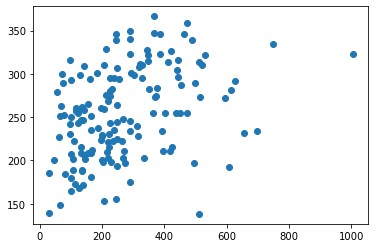

In [663]:
plt.scatter(y_test,y_pred)

In [664]:
plt.show()

In [665]:
from keras.models import load_model

In [666]:
model = tf.keras.models.Sequential()

In [667]:
model.add(tf.keras.Input(shape=(4,)))

In [668]:
model.add(tf.keras.layers.Dense(1))

In [669]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(1.5e-4))

In [670]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data =(x_val, y_val))

Train on 486 samples, validate on 122 samples
Epoch 1/200
486/486 [==============================] - 1s 2ms/sample - loss: 57993.7729 - val_loss: 42038.9700
Epoch 2/200
486/486 [==============================] - 0s 109us/sample - loss: 45542.7161 - val_loss: 37863.4355
Epoch 3/200
486/486 [==============================] - 0s 90us/sample - loss: 42319.6566 - val_loss: 34477.0797
Epoch 4/200
486/486 [==============================] - 0s 82us/sample - loss: 39039.3462 - val_loss: 32219.2870
Epoch 5/200
486/486 [==============================] - 0s 74us/sample - loss: 36828.3293 - val_loss: 30255.6339
Epoch 6/200
486/486 [==============================] - 0s 70us/sample - loss: 34752.3927 - val_loss: 27844.2674
Epoch 7/200
486/486 [==============================] - 0s 66us/sample - loss: 33129.1391 - val_loss: 26455.3912
Epoch 8/200
486/486 [==============================] - 0s 82us/sample - loss: 32080.2011 - val_loss: 27684.7552
Epoch 9/200
486/486 [==============================] - 0s 

Epoch 73/200
486/486 [==============================] - 0s 84us/sample - loss: 26602.7263 - val_loss: 19173.2058
Epoch 74/200
486/486 [==============================] - 0s 82us/sample - loss: 26751.0009 - val_loss: 19894.9921
Epoch 75/200
486/486 [==============================] - 0s 84us/sample - loss: 26761.5423 - val_loss: 18723.5662
Epoch 76/200
486/486 [==============================] - 0s 76us/sample - loss: 26507.8471 - val_loss: 19216.3111
Epoch 77/200
486/486 [==============================] - 0s 68us/sample - loss: 26564.5289 - val_loss: 18931.7738
Epoch 78/200
486/486 [==============================] - 0s 86us/sample - loss: 26531.7591 - val_loss: 18703.7482
Epoch 79/200
486/486 [==============================] - 0s 107us/sample - loss: 26530.5220 - val_loss: 18803.1290
Epoch 80/200
486/486 [==============================] - 0s 86us/sample - loss: 26749.4729 - val_loss: 18868.5660
Epoch 81/200
486/486 [==============================] - 0s 103us/sample - loss: 26704.4657 - va

Epoch 145/200
486/486 [==============================] - 0s 105us/sample - loss: 26532.0278 - val_loss: 18897.2897
Epoch 146/200
486/486 [==============================] - 0s 101us/sample - loss: 26588.7603 - val_loss: 18697.7551
Epoch 147/200
486/486 [==============================] - 0s 101us/sample - loss: 26495.2349 - val_loss: 18932.9700
Epoch 148/200
486/486 [==============================] - 0s 92us/sample - loss: 26669.5259 - val_loss: 18835.2579
Epoch 149/200
486/486 [==============================] - 0s 90us/sample - loss: 26602.8372 - val_loss: 18775.7256
Epoch 150/200
486/486 [==============================] - 0s 103us/sample - loss: 26627.8588 - val_loss: 19017.9452
Epoch 151/200
486/486 [==============================] - 0s 109us/sample - loss: 26728.1950 - val_loss: 20400.4791
Epoch 152/200
486/486 [==============================] - 0s 185us/sample - loss: 26617.7173 - val_loss: 18925.4020
Epoch 153/200
486/486 [==============================] - 0s 189us/sample - loss: 2

In [671]:
print("dict :",history.history)

dict : {'loss': [57993.7728909465, 45542.71611368313, 42319.656619727364, 39039.346225565845, 36828.32934670782, 34752.392686631945, 33129.13912197788, 32080.20106738683, 31395.534521283436, 30083.387626993313, 29663.246013374486, 30047.603330761318, 28578.106263462898, 28220.953896604937, 27879.954443158436, 27638.119389789095, 27394.89206372171, 27440.163660622427, 27247.615598074204, 27021.69325488683, 26994.432934670782, 26975.48353909465, 27070.784221884645, 26730.51489358282, 26692.739691840277, 26758.68928433642, 26859.357052147632, 26763.05659239969, 26686.35431134259, 26615.96138559349, 26679.242058899177, 26900.428526073818, 26605.3002186214, 27003.815461837705, 26612.84495965149, 26675.087247620886, 26466.41089972351, 26565.0856561857, 26638.34467029964, 26837.6478909465, 26562.124742798354, 27331.546167695473, 27404.418507265946, 26788.6713123714, 26732.6274996785, 26766.62644675926, 26694.536086596578, 26612.295289592977, 26749.15825135031, 26766.639049639918, 26601.267232

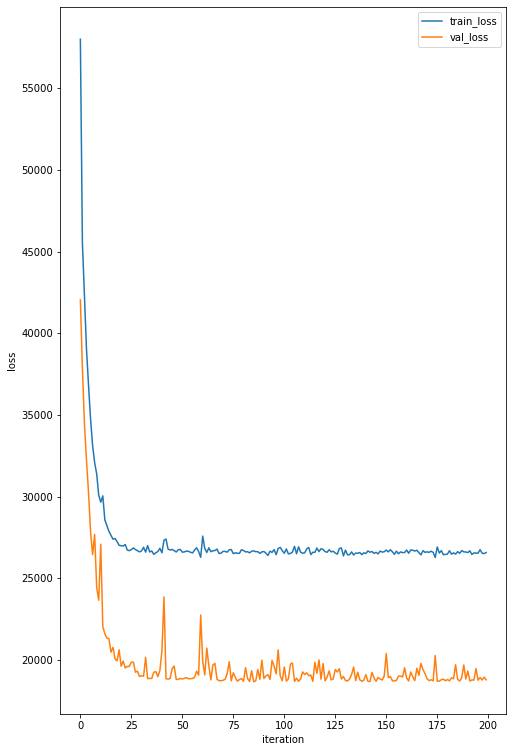

In [672]:
plt.figure(figsize=(8,13))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss','val_loss'])
plt.show()



In [673]:
score = model.evaluate(x_test, y_test)

152/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [674]:
print(score)

23480.937037417763


In [675]:
from tensorflow.keras.models import load_model

In [676]:
input_array = np.array([27,30,25,110])

In [677]:
input_array_for_prediction = np.expand_dims(input_array,axis=0)

In [678]:
print(model.predict(input_array_for_prediction))

[[-151.18564]]


In [679]:
export_path = 'D:/pk_data'

In [680]:
model.save(export_path,save_format="tf")

INFO:tensorflow:Assets written to: D:/pk_data\assets


In [681]:
saved_model_dir="D:/pk_data"

In [682]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

In [683]:
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS,tf.lite.OpsSet.SELECT_TF_OPS]

In [684]:
tflite_model=converter.convert()

In [685]:
open('D:/pk_data/converted_model.tflite','wb').write(tflite_model)

800